In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

Find the homography matrix that transforms image1 to image 2 and plot the results

In [12]:
import os
os.getcwd()

'e:\\AUS Semesters\\Spring 24\\COE 49413\\ComputerVision\\tasks'

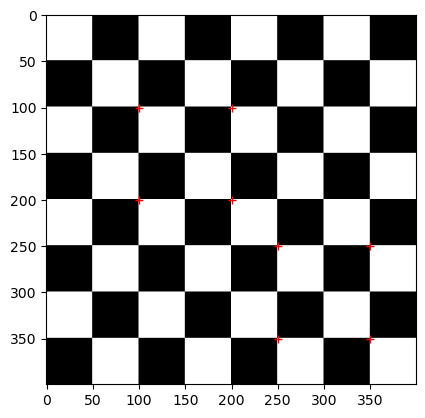

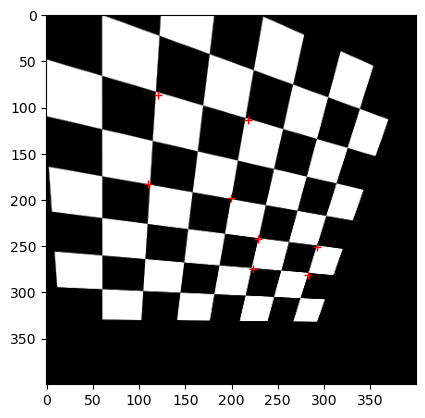

In [15]:
image1 = cv2.imread('../data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('../data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)

pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]]).T
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)]).T
plt.imshow(image1, cmap='gray')
plt.plot(pts1[0,:], pts1[1,:],'r+')
plt.show()
plt.imshow(image2, cmap='gray')
plt.plot(pts2[0,:], pts2[1,:],'r+')
plt.show()

In [45]:
H = cv2.getPerspectiveTransform(np.array(pts1[:,:4], dtype=np.float32).T, np.array(pts2[:,:4], dtype=np.float32).T)
pts2_ = cv2.perspectiveTransform(np.array(pts1[:,:,np.newaxis], dtype=np.float32).T, H)

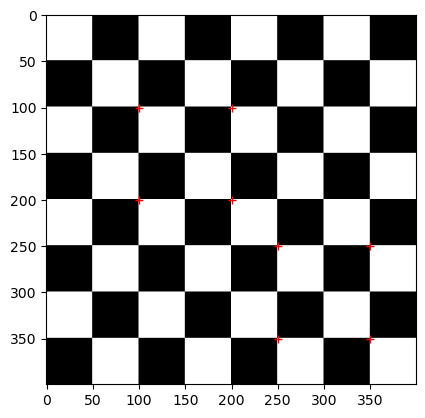

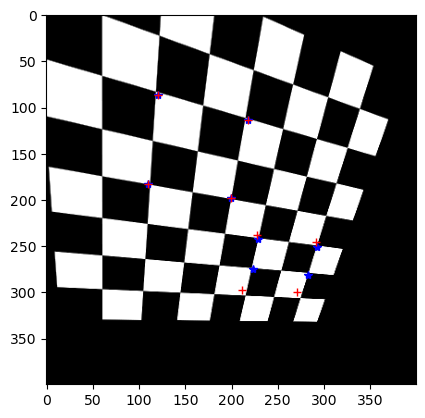

In [58]:
plt.imshow(image1, cmap='gray')
plt.plot(pts1[0,:], pts1[1,:],'r+')
plt.show()


plt.imshow(image2, cmap='gray')
plt.plot(pts2[0,:], pts2[1,:],'b*')
plt.plot(pts2_[:,:,0].T, pts2_[:,:,1].T,'r+')
plt.show()

In [ ]:
pts2_

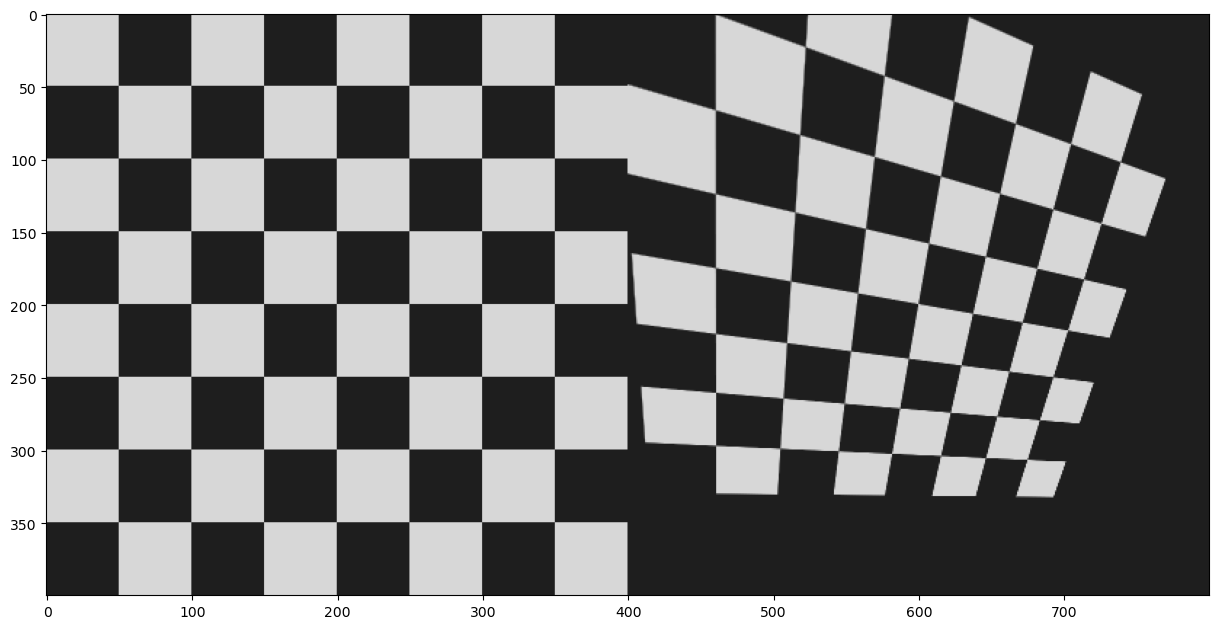

(<matplotlib.image.AxesImage at 0x267fdf1e220>, None)

In [20]:
# Initialize the ORB detector
feat = cv2.SIFT_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = feat.detectAndCompute(image1, None)
kp2, des2 = feat.detectAndCompute(image2, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

# Extract the matched keypoints
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Use RANSAC to estimate the homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=5)

# Draw the matching 
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = mask.ravel().tolist(), # draw only inliers
                   flags = 2)
plt.figure(figsize=(15,15))
output_image = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(output_image, 'gray'),plt.show()